<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/OpenCV/OpenCvTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Coloaboratory での OpenCV チュートリアル

このノートのプログラムは ["PythonでOpenCVを使ってみよう"](https://momonoki2017.blogspot.com/2019/06/pythonopencv01.html) と ["Haar Cascadesを使った顔検出"](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html) を利用。

## 画像の表示

[標準画像データベース(SIDBA)](http://www.ess.ic.kanagawa-it.ac.jp/app_images_j.html)から画像をダウンロード

In [1]:
import os
import urllib.request
import shutil

if not os.path.exists("./color"):
    dataset_url = "http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/color.zip"
    urllib.request.urlretrieve(dataset_url, "color.zip")
    shutil.unpack_archive('color.zip', 'color')

Google Colaboratory では cv2.imshow() のパッチが提供されている

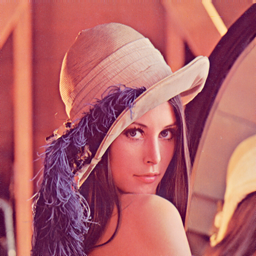

In [2]:
import cv2
from google.colab.patches import cv2_imshow

img_bgr = cv2.imread("./color/Lenna.bmp")
cv2_imshow(img_bgr)

OpenCV は BGR データがデフォルトのため、
RGB データがデフォルトの matplotlib では色が反転

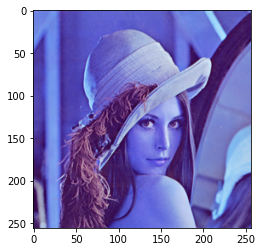

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_bgr)
plt.show()

RGB に変換すれば元の色に

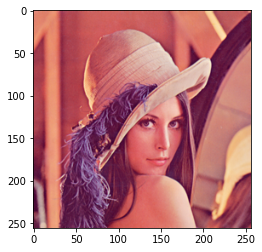

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 簡単な処理

Haar-cascade の識別機の読み込み

In [5]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, "haarcascade_frontalface_default.xml") 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
urllib.request.urlretrieve(url, "haarcascade_eye.xml") 
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

顔と眼の認識

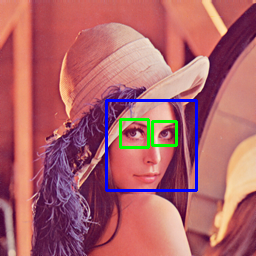

In [6]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for (x,y,w,h) in faces:
    img_bgr = cv2.rectangle(img_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img_bgr)